In [1]:
from vae import VAEModel
from load_data import load_mnist

## Load data

In [2]:
X_train, y_train, X_test, y_test = load_mnist()

## Train VAE

In [3]:
model = VAEModel(latent_dim=20, beta=1)

In [4]:
_ = model.train_vae(X_train, 5000, learning_rate=1e-3, batch_size=512, print_error_every=10)

Epoch 0: error = 241.6915
Epoch 10: error = 127.1522
Epoch 20: error = 120.702
Epoch 30: error = 118.3167
Epoch 40: error = 116.8519
Epoch 50: error = 116.1104
Epoch 60: error = 115.3901
Epoch 70: error = 114.868
Epoch 80: error = 114.5161
Epoch 90: error = 114.028
Epoch 100: error = 113.8075
Epoch 110: error = 113.7647
Epoch 120: error = 113.6693
Epoch 130: error = 113.33
Epoch 140: error = 113.1167
Epoch 150: error = 112.9867
Epoch 160: error = 112.8657
Epoch 170: error = 112.6898
Epoch 180: error = 112.5937
Epoch 190: error = 112.4489
Epoch 200: error = 112.5205
Epoch 210: error = 112.1953
Epoch 220: error = 112.0872
Epoch 230: error = 112.2392
Epoch 240: error = 111.911
Epoch 250: error = 111.9165
Epoch 260: error = 111.9871
Epoch 270: error = 111.9469
Epoch 280: error = 111.8792
Epoch 290: error = 111.7446
Epoch 300: error = 111.6788
Epoch 310: error = 111.5593
Epoch 320: error = 111.5206
Epoch 330: error = 111.5833
Epoch 340: error = 111.483
Epoch 350: error = 111.4063
Epoch 360:

KeyboardInterrupt: 

Test loss = 86.3843


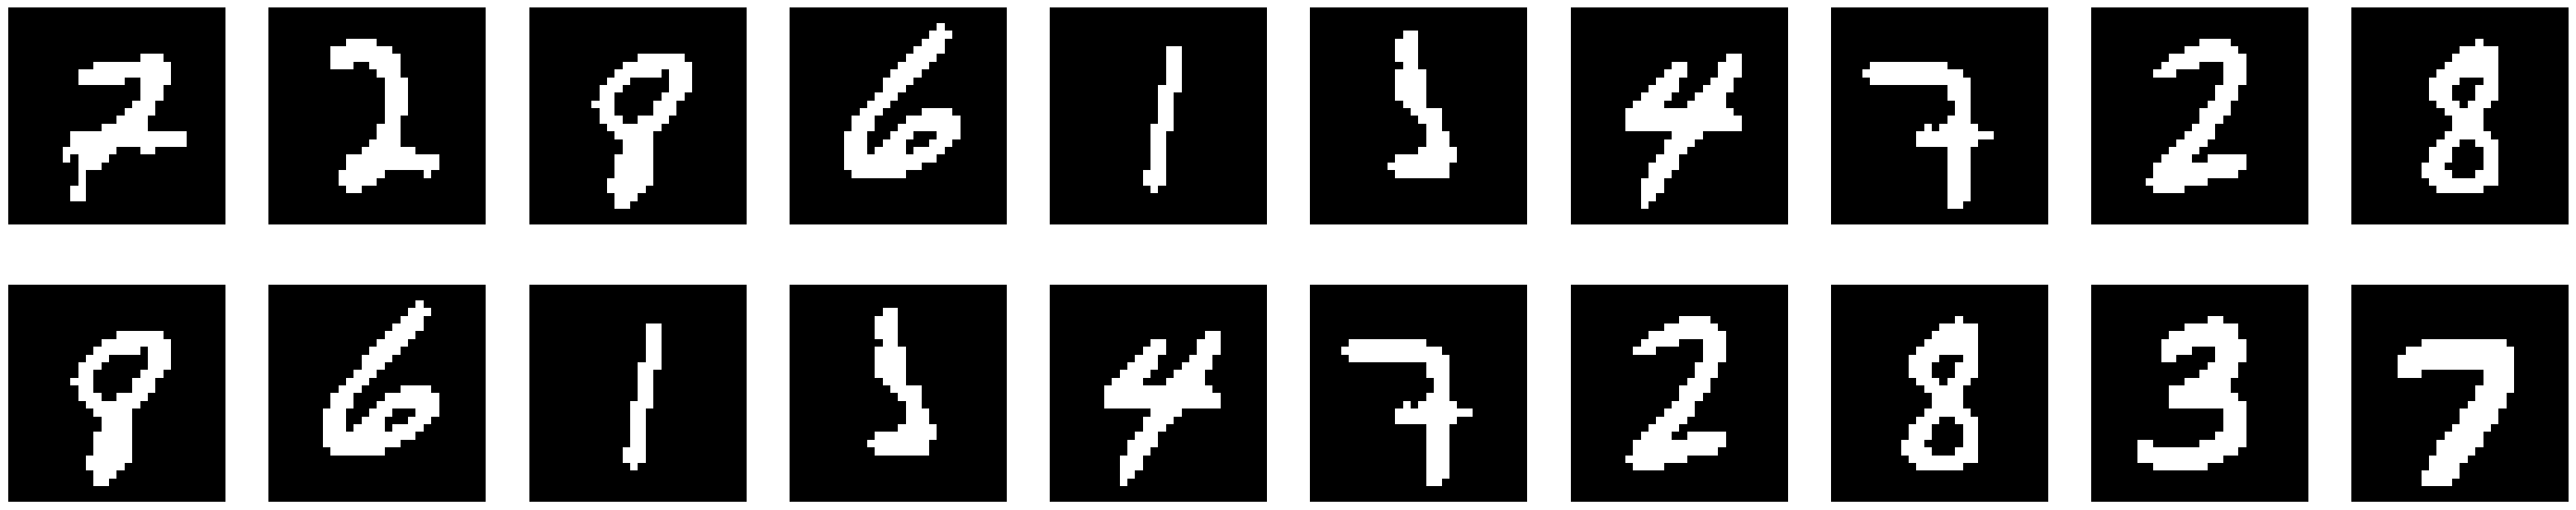

In [5]:
l, r = model.test_vae(X_test, ncols=10, nb_to_plot=20)

## Generate new samples

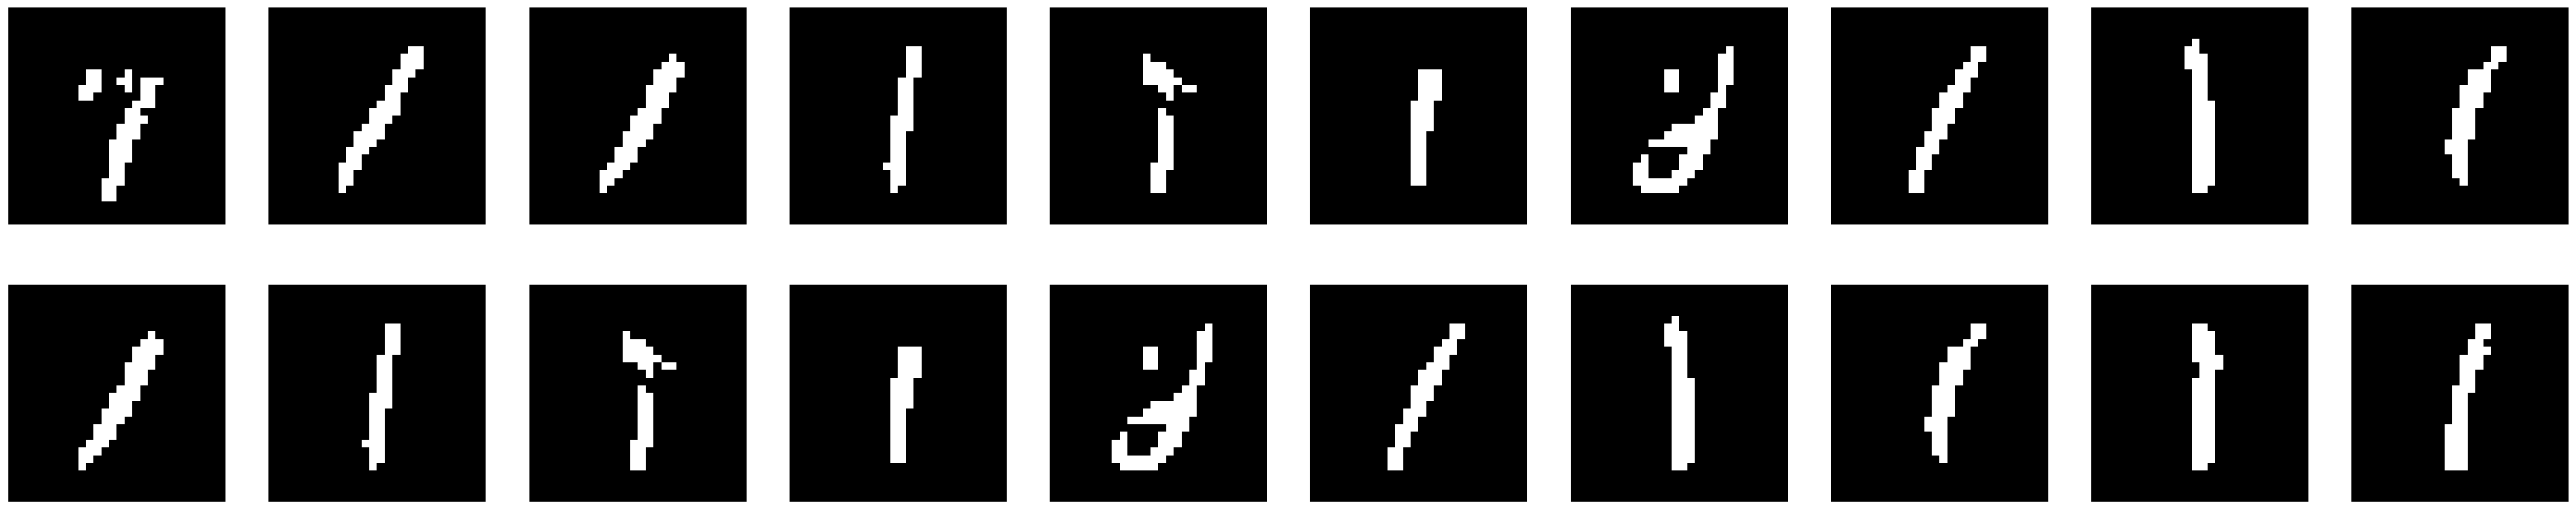

In [6]:
gen = model.generate_data()

In [ ]:
model.compute_fid_score(X_test, batch_size=256)

2390.011470302695